In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [83]:
# Load in the datasets
df_train = pd.read_csv('../data/train.csv')
df_oil = pd.read_csv('../data/oil.csv')
df_holidays_events = pd.read_csv('../data/holidays_events.csv')
df_stores = pd.read_csv('../data/stores.csv')
df_transactions = pd.read_csv('../data/transactions.csv')
# df_test = pd.read_csv('../data/test.csv')

df_train['date'] = pd.to_datetime(df_train['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_holidays_events['date'] = pd.to_datetime(df_holidays_events['date'])
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

dataframes = {
    'Training dataset': df_train,
    'Oil price dataset' :df_oil,
    'Holidays and events dataset': df_holidays_events,
    'Stores dataset': df_stores,
    'Transactions dataset': df_transactions
}

In [19]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False) 

# Task 1. Data Exploration

## a. Explore the dataset by displaying the first few rows, summary statistics, and data types of each column.

### Display the first 5 rows
**Har valgt å ta de separat fordi det virker som at data clean kommer før integration**

In [41]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(df.head())

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0
1,1,2013-01-01,1,BABY CARE,0.00,0
2,2,2013-01-01,1,BEAUTY,0.00,0
3,3,2013-01-01,1,BEVERAGES,0.00,0
4,4,2013-01-01,1,BOOKS,0.00,0


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


### Display the summary statistics for numerical columns

In [42]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(df.describe())

,id,store_nbr,sales,onpromotion
count,3000888.00,3000888.00,3000888.00,3000888.00
mean,1500443.50,27.50,357.78,2.60
std,866281.89,15.59,1102.00,12.22
min,0.00,1.00,0.00,0.00
25%,750221.75,14.00,0.00,0.00
50%,1500443.50,27.50,11.00,0.00
75%,2250665.25,41.00,195.85,0.00
max,3000887.00,54.00,124717.00,741.00


,dcoilwtico
count,1175.00
mean,67.71
std,25.63
min,26.19
25%,46.41
50%,53.19
75%,95.66
max,110.62


,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


,store_nbr,cluster
count,54.00,54.00
mean,27.50,8.48
std,15.73,4.69
min,1.00,1.00
25%,14.25,4.00
50%,27.50,8.50
75%,40.75,13.00
max,54.00,17.00


,store_nbr,transactions
count,83488.00,83488.00
mean,26.94,1694.60
std,15.61,963.29
min,1.00,5.00
25%,13.00,1046.00
50%,27.00,1393.00
75%,40.00,2079.00
max,54.00,8359.00


### Display the data type of each column

In [44]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(df.dtypes)

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

date           object
dcoilwtico    float64
dtype: object

date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object

store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object

date            object
store_nbr        int64
transactions     int64
dtype: object

## b. Identify missing values, outliers, and unique values in categorical columns.

### Check for missing values

In [46]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(df.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

date           0
dcoilwtico    43
dtype: int64

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

date            0
store_nbr       0
transactions    0
dtype: int64

### Check for outliers
#### Start with visualizing the numerical data to get a picture of how the data looks in terms of distribution
##### Sales & promotion:
"Since the distribution is skewed with a very long tail, it's clear that there are outliers"

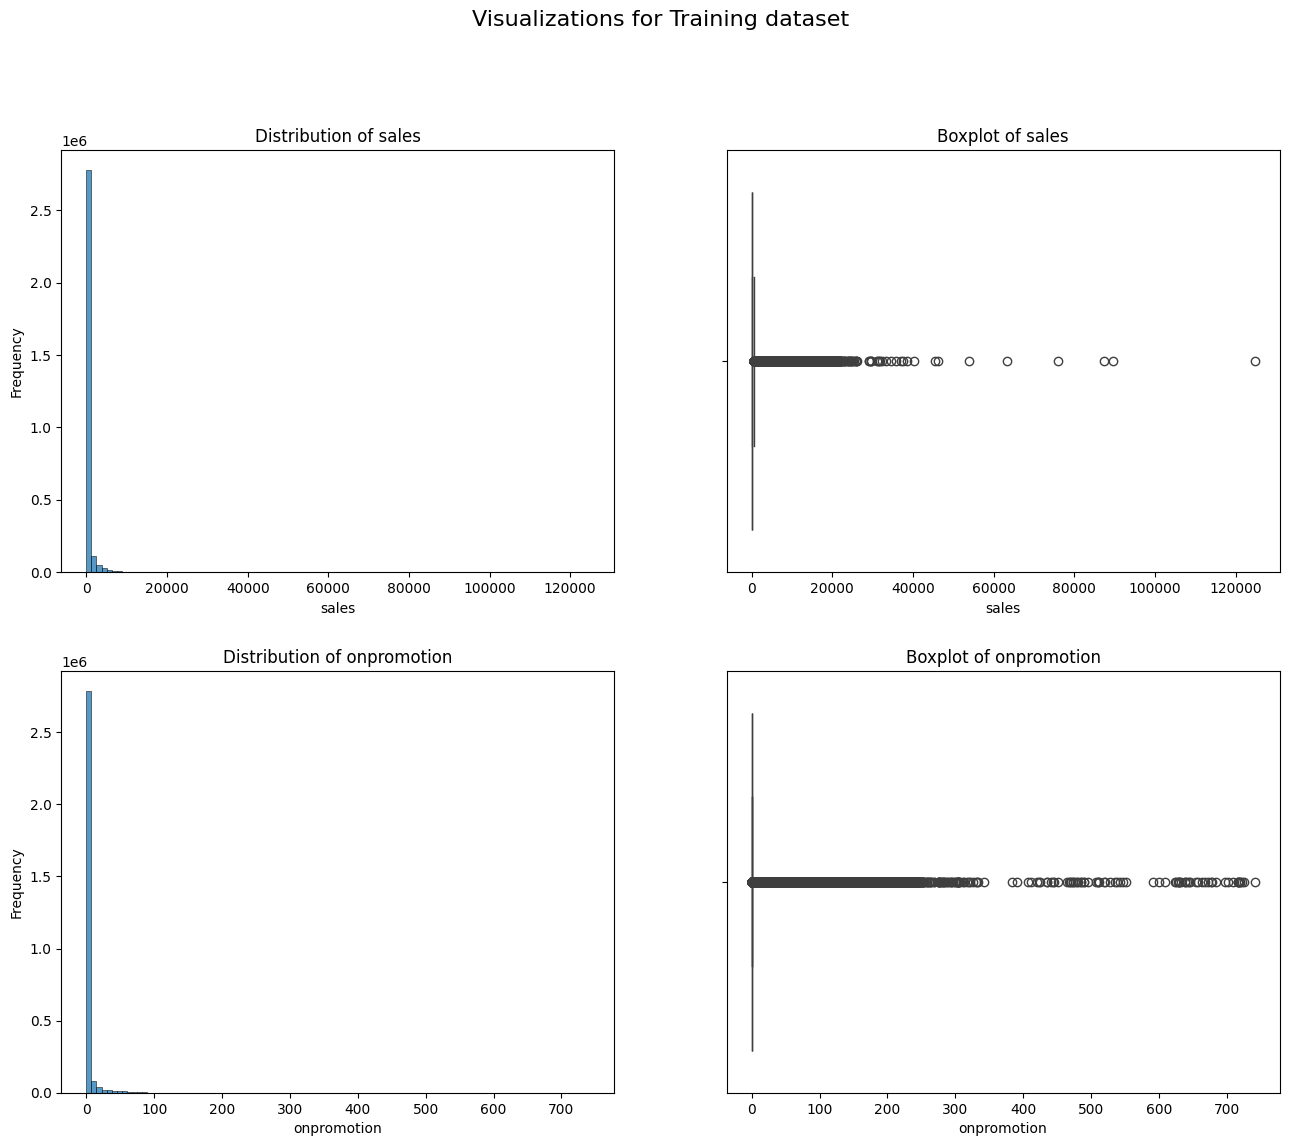

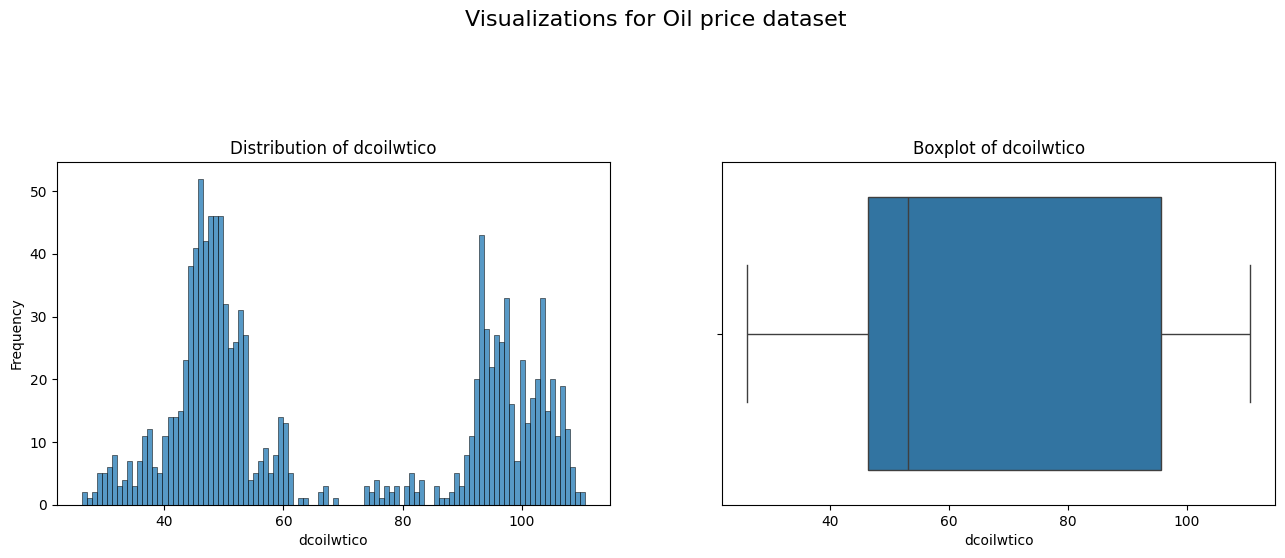

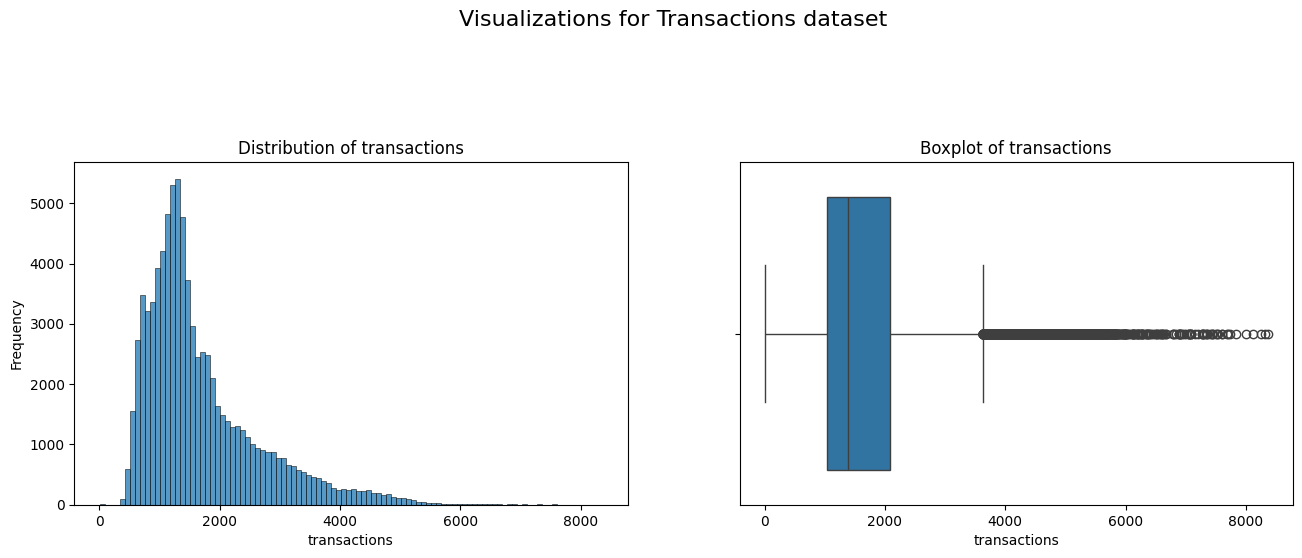

In [51]:
numerical_columns_of_interest = ['sales', 'onpromotion', 'transactions', 'dcoilwtico']

for name, df in dataframes.items():
    valid_columns = [col for col in numerical_columns_of_interest if col in df.columns]
    if valid_columns:
        num_columns = len(valid_columns)
        fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(14, num_columns * 6))
        fig.tight_layout(pad=5.0)
        for i, column in enumerate(valid_columns):
            if num_columns == 1:
                sns.histplot(df[column], bins=100, ax=axes[0])
                axes[0].set_title(f'Distribution of {column}')
                axes[0].set_xlabel(column)
                axes[0].set_ylabel('Frequency')
                sns.boxplot(x=df[column], ax=axes[1])
                axes[1].set_title(f'Boxplot of {column}')
                axes[1].set_xlabel(column)
            else:
                sns.histplot(df[column], bins=100, ax=axes[i, 0])
                axes[i, 0].set_title(f'Distribution of {column}')
                axes[i, 0].set_xlabel(column)
                axes[i, 0].set_ylabel('Frequency')
                sns.boxplot(x=df[column], ax=axes[i, 1])
                axes[i, 1].set_title(f'Boxplot of {column}')
                axes[i, 1].set_xlabel(column)
        plt.show()

### Check for unique values in categorical columns

In [54]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(
        HTML(
            pd.DataFrame(
                [
                    {
                        "Column Name": column,
                        "Unique Values": ", ".join(map(str, df[column].unique())),
                    }
                    for column in df.select_dtypes(include=["object"]).columns if column != 'date'
                ]
            ).to_html(index=False)
        )
    )

Column Name,Unique Values
family,"AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOOKS, BREAD/BAKERY, CELEBRATION, CLEANING, DAIRY, DELI, EGGS, FROZEN FOODS, GROCERY I, GROCERY II, HARDWARE, HOME AND KITCHEN I, HOME AND KITCHEN II, HOME APPLIANCES, HOME CARE, LADIESWEAR, LAWN AND GARDEN, LINGERIE, LIQUOR,WINE,BEER, MAGAZINES, MEATS, PERSONAL CARE, PET SUPPLIES, PLAYERS AND ELECTRONICS, POULTRY, PREPARED FOODS, PRODUCE, SCHOOL AND OFFICE SUPPLIES, SEAFOOD"


Column Name,Unique Values
type,"Holiday, Transfer, Additional, Bridge, Work Day, Event"
locale,"Local, Regional, National"
locale_name,"Manta, Cotopaxi, Cuenca, Libertad, Riobamba, Puyo, Guaranda, Imbabura, Latacunga, Machala, Santo Domingo, El Carmen, Cayambe, Esmeraldas, Ecuador, Ambato, Ibarra, Quevedo, Santo Domingo de los Tsachilas, Santa Elena, Quito, Loja, Salinas, Guayaquil"
description,"Fundacion de Manta, Provincializacion de Cotopaxi, Fundacion de Cuenca, Cantonizacion de Libertad, Cantonizacion de Riobamba, Cantonizacion del Puyo, Cantonizacion de Guaranda, Provincializacion de Imbabura, Cantonizacion de Latacunga, Fundacion de Machala, Fundacion de Santo Domingo, Cantonizacion de El Carmen, Cantonizacion de Cayambe, Fundacion de Esmeraldas, Primer Grito de Independencia, Fundacion de Riobamba, Fundacion de Ambato, Fundacion de Ibarra, Cantonizacion de Quevedo, Independencia de Guayaquil, Traslado Independencia de Guayaquil, Dia de Difuntos, Independencia de Cuenca, Provincializacion de Santo Domingo, Provincializacion Santa Elena, Independencia de Guaranda, Independencia de Latacunga, Independencia de Ambato, Fundacion de Quito-1, Fundacion de Quito, Fundacion de Loja, Navidad-4, Cantonizacion de Salinas, Navidad-3, Navidad-2, Puente Navidad, Navidad-1, Navidad, Navidad+1, Puente Primer dia del ano, Primer dia del ano-1, Primer dia del ano, Recupero puente Navidad, Recupero puente primer dia del ano, Carnaval, Viernes Santo, Dia del Trabajo, Dia de la Madre-1, Dia de la Madre, Batalla de Pichincha, Fundacion de Guayaquil-1, Fundacion de Guayaquil, Inauguracion Mundial de futbol Brasil, Mundial de futbol Brasil: Ecuador-Suiza, Mundial de futbol Brasil: Ecuador-Honduras, Mundial de futbol Brasil: Ecuador-Francia, Mundial de futbol Brasil: Octavos de Final, Mundial de futbol Brasil: Cuartos de Final, Mundial de futbol Brasil: Semifinales, Mundial de futbol Brasil: Tercer y cuarto lugar, Mundial de futbol Brasil: Final, Black Friday, Cyber Monday, Recupero Puente Navidad, Recupero Puente Primer dia del ano, Terremoto Manabi, Terremoto Manabi+1, Terremoto Manabi+2, Terremoto Manabi+3, Terremoto Manabi+4, Terremoto Manabi+5, Terremoto Manabi+6, Terremoto Manabi+7, Terremoto Manabi+8, Terremoto Manabi+9, Terremoto Manabi+10, Terremoto Manabi+11, Terremoto Manabi+12, Terremoto Manabi+13, Terremoto Manabi+14, Terremoto Manabi+15, Terremoto Manabi+16, Terremoto Manabi+17, Terremoto Manabi+18, Terremoto Manabi+19, Terremoto Manabi+20, Terremoto Manabi+21, Terremoto Manabi+22, Terremoto Manabi+23, Terremoto Manabi+24, Terremoto Manabi+25, Terremoto Manabi+26, Terremoto Manabi+27, Terremoto Manabi+28, Terremoto Manabi+29, Terremoto Manabi+30, Traslado Batalla de Pichincha, Traslado Fundacion de Guayaquil, Traslado Primer Grito de Independencia, Puente Dia de Difuntos, Recupero Puente Dia de Difuntos, Traslado Primer dia del ano, Traslado Fundacion de Quito"


Column Name,Unique Values
city,"Quito, Santo Domingo, Cayambe, Latacunga, Riobamba, Ibarra, Guaranda, Puyo, Ambato, Guayaquil, Salinas, Daule, Babahoyo, Quevedo, Playas, Libertad, Cuenca, Loja, Machala, Esmeraldas, Manta, El Carmen"
state,"Pichincha, Santo Domingo de los Tsachilas, Cotopaxi, Chimborazo, Imbabura, Bolivar, Pastaza, Tungurahua, Guayas, Santa Elena, Los Rios, Azuay, Loja, El Oro, Esmeraldas, Manabi"
type,"D, B, C, E, A"


# Task 2. Data Cleaning

## a. Handling Missing Values
## b. Choose appropriate methods to handle missing values (e.g., mean/median imputation for numerical data, mode imputation for categorical data, or deletion of rows/columns).

Det er kun oil price som har missing values, og den har kun 1219 rader. 
Dette går nok innunder kategorien 'lite datasett', og man kan dermed ikke bare fjerne radene med manglende verdier. Dette kommer til å fjerne 5% av datasettet. 

Da blir det "imputation", narurlig med mean eller median. [Denne](https://www.kaggle.com/code/pagenotfound/mean-and-median-imputation) artikkelen sier at mean brukes når fordelingen er normalfordelt, eller median. Basert på histogrammet er det tydelig at fordelingen ikke er normalfordelt, så da blir det median. Det gir iidlertid denne utviklingen, som ikke ser helt realistisk ut:

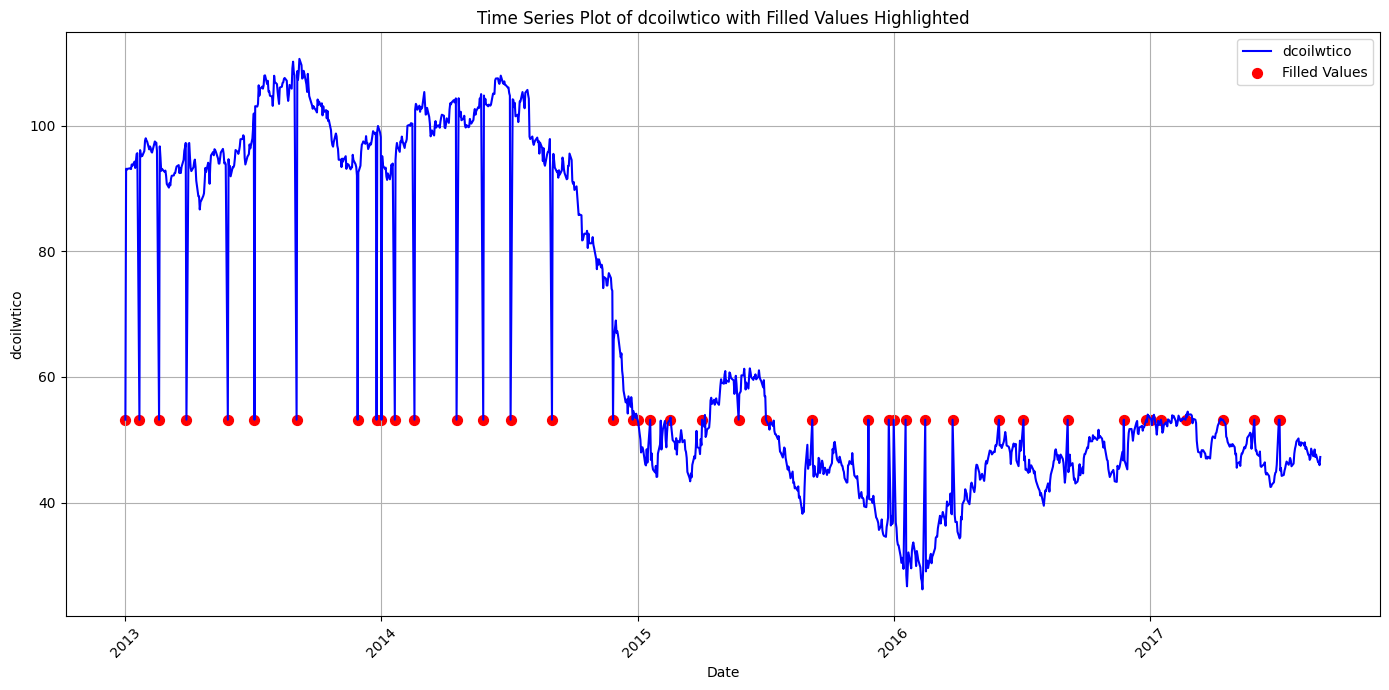

In [86]:
df_oil_copy = df_oil.copy()
median_value = df_oil_copy['dcoilwtico'].median()
original_dcoilwtico = df_oil_copy['dcoilwtico'].copy()
df_oil_copy['dcoilwtico'] = df_oil_copy['dcoilwtico'].fillna(median_value)
filled_mask = original_dcoilwtico.isnull()
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_oil_copy, x='date', y='dcoilwtico', color='blue', label='dcoilwtico', marker='', linestyle='-')
plt.scatter(df_oil_copy.loc[filled_mask, 'date'], 
    df_oil_copy.loc[filled_mask, 'dcoilwtico'], 
    color='red', label='Filled Values', s=50
)
plt.title('Time Series Plot of dcoilwtico with Filled Values Highlighted')
plt.xlabel('Date')
plt.ylabel('dcoilwtico')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


Index(['date', 'dcoilwtico'], dtype='object')


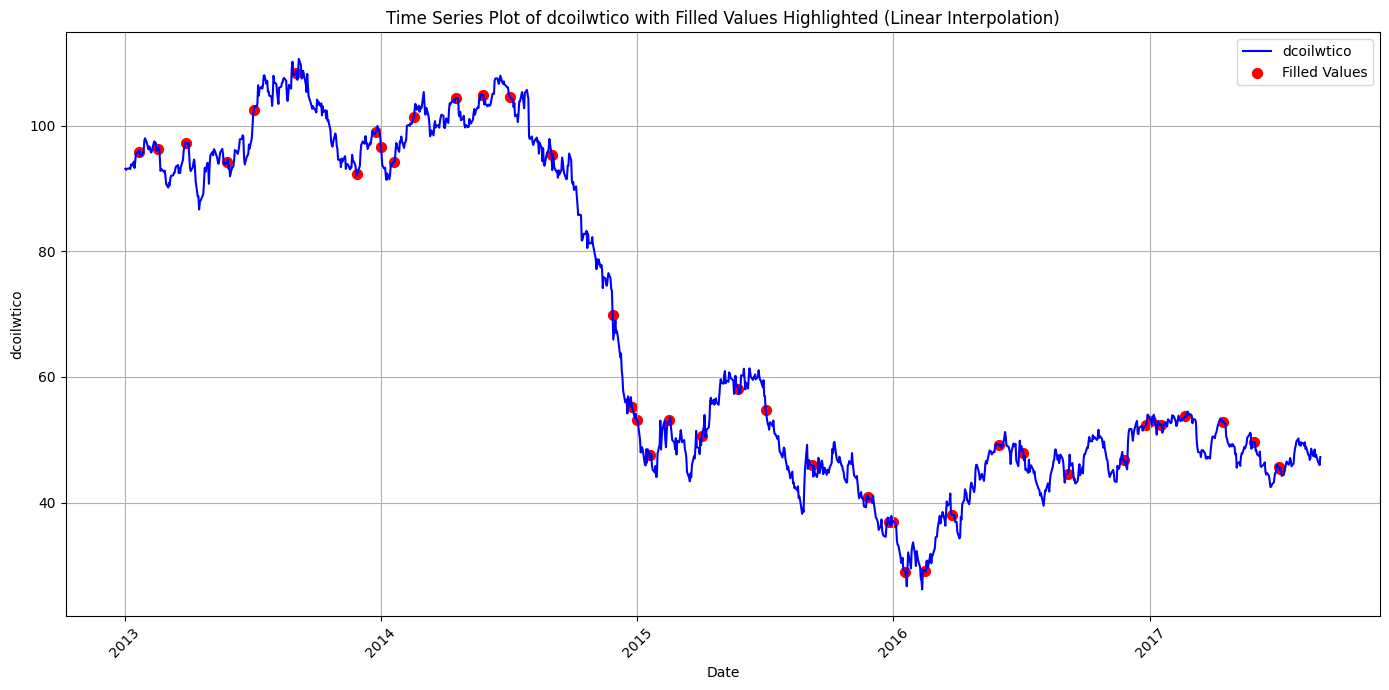

In [89]:
df_oil_copy = df_oil.copy()
original_dcoilwtico = df_oil_copy['dcoilwtico'].copy()
df_oil_copy['dcoilwtico'] = df_oil_copy['dcoilwtico'].interpolate()
filled_mask = original_dcoilwtico.isnull()
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_oil_copy, x='date', y='dcoilwtico', color='blue', label='dcoilwtico', marker='', linestyle='-')
plt.scatter(df_oil_copy.loc[filled_mask, 'date'], 
            df_oil_copy.loc[filled_mask, 'dcoilwtico'], 
            color='red', label='Filled Values', s=50)
plt.title('Time Series Plot of dcoilwtico with Filled Values Highlighted (Linear Interpolation)')
plt.xlabel('Date')
plt.ylabel('dcoilwtico')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


## c. Justify your choices for handling missing data.

Basert på timeseries'ene, så virker det svært lite realitsik at de verdiene vi erstatter faktisk er median-verdier, eller noe i nærheten. Ved å plott opp utfyllingen ved å heller bruke lin